# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [1]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#load and inspect the data
df = pd.read_csv("reg_data.csv", header=None)

In [24]:
df.rename(columns = {0:"x", 1:"y"}, inplace=True)

In [25]:
df.head()

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


<AxesSubplot:xlabel='x', ylabel='y'>

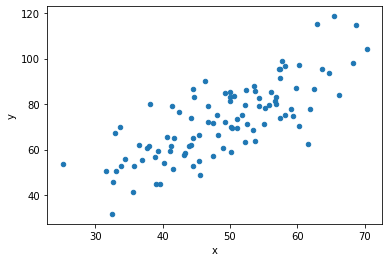

In [26]:
#plot the data
df.plot.scatter(x="x", y="y")

Write your inital observations below:



In [34]:
#implement a least squares function to find a, b
X = df['x']
y = df['y']
import statsmodels.api as sm
X_sm = sm.add_constant(X)
stat_model = sm.OLS(y, X_sm)
print(stat_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           3.86e-21
Time:                        10:38:35   Log-Likelihood:                -377.03
No. Observations:                 100   AIC:                             758.1
Df Residuals:                      98   BIC:                             763.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9910      5.459      1.464      0.1

In [38]:
#plot the regression line as x and y
b = np.sum(( X - np.mean(X)) * (y - np.mean(y))) / np.sum(np.square(X - np.mean(X)))
a = np.mean(y) - (b * np.mean(X))

In [40]:
print(f"coefficient=>b/m: {b}")
print(f"intercept=>a/c: {a}")

coefficient=>b/m: 1.3224310227553597
intercept=>a/c: 7.991020982270399


In [46]:
X = df['x'].values.reshape(-1,1)
y = df['y'].values
print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}\n=========================")

# Train and Predict using linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model_linreg = lin_reg.fit(X,y)
print("The linear regression coefficient can be accessed in a form of class attribute with model.coef_")
print("model coefficient = ", model_linreg.coef_,"\n==================================")
print("The y-intercept can be accessed in a form of class attribute with model.intercept_")
print(f"y-intercept = {model_linreg.intercept_}\n================================" )
y_prediction = model_linreg.predict(X)

# Evaluate
r2 = model_linreg.score(X,y)
print(f"R-squared = {r2}")

X.shape = (100, 1)
y.shape = (100,)
The linear regression coefficient can be accessed in a form of class attribute with model.coef_
model coefficient =  [1.32243102] 
The y-intercept can be accessed in a form of class attribute with model.intercept_
y-intercept = 7.991020982270399
R-squared = 0.5986557915386619


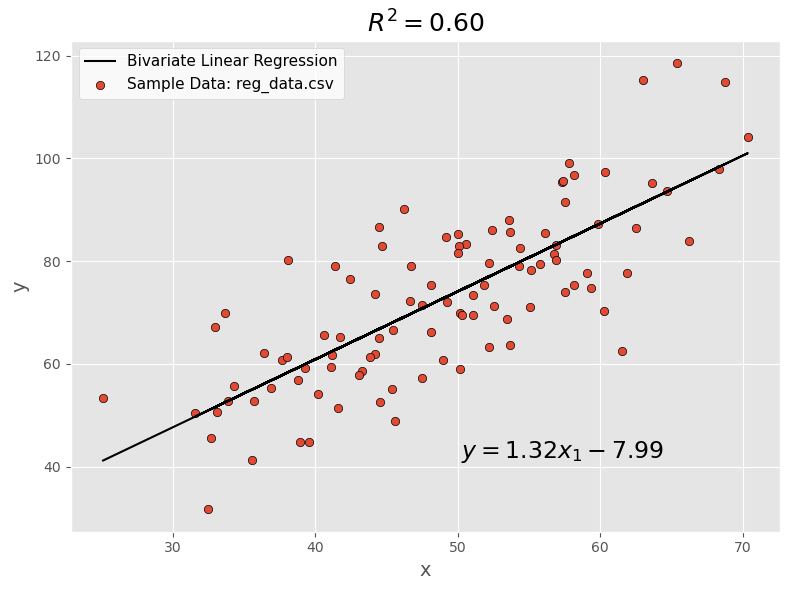

In [47]:
# Plot 
plt.style.use('default')
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(X, y_prediction, color='k', label='Bivariate Linear Regression')
ax.scatter(X,y, edgecolor='k', label='Sample Data: reg_data.csv')
ax.set_ylabel('y', fontsize=14)
ax.set_xlabel('x', fontsize=14)
ax.text(0.8,0.1,'', fontsize=13, ha='center', va='center', 
        transform=ax.transAxes, color='gray')
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model_linreg.coef_[0], abs(model_linreg.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()

<Figure size 504x504 with 0 Axes>

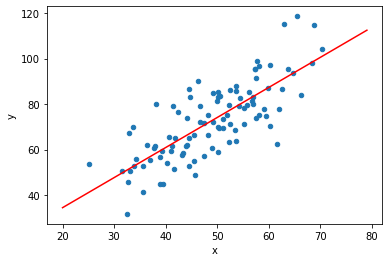

In [22]:
#plot the original data with the regression line as defined by your function


Write your final observations below:
### Best fit line is able explain 60% variance of `x` data


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
class Linear_Regression:

    def __init__(self):
        self.intercept_c_a = 0
        self.slope_m_b = 0

    def fit(self, X, y):
        # slope and intercept 
        self.slope_m_b = np.sum(( X - np.mean(X)) * (y - np.mean(y))) / np.sum(np.square(X - np.mean(X)))
        self.intercept_c_a = np.mean(y) - (self.slope_m_b * np.mean(X))
        return self.slope_m_b, self.intercept_c_a
    
    def predict(self, X):
        self.y_pred = self.slope_m_b*X + self.intercept_c_a
        return self.y_pred

    def plot(self,X,y):
        sns.scatterplot(X, y)
        sns.lineplot(x=X, y=(self. intercept_c_a+self.slope_m_b*X), color='red')
        plt.show()

In [80]:
X = df['x'].values  #.reshape(-1,1)
y = df['y'].values
lr = Linear_Regression()
model = lr.fit(X,y)
y_pred = lr.predict(X)
print(lr.slope_m_b)
print(lr.intercept_c_a)

1.3224310227553597
7.991020982270399


C:\Users\Saurabh\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


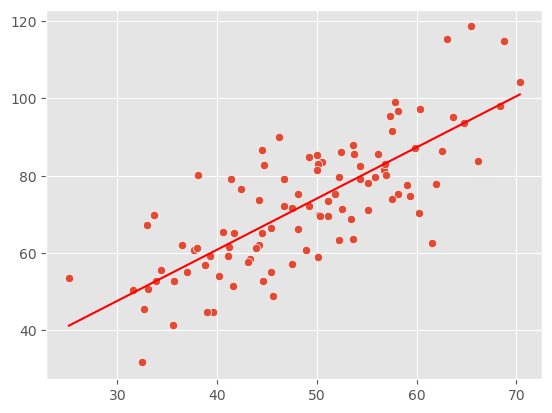

In [81]:
lr.plot(X,y)